#### Verifica e instala pacotes

In [1]:
if(!require('dplyr')) install.packages('dplyr')
if(!require('tidytext')) install.packages('tidytext')
if(!require('purrr')) install.packages('purrr')
if(!require('gutenbergr')) install.packages('gutenbergr')
if(!require('ggplot2')) install.packages('ggplot2')

Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: tidytext
Loading required package: purrr
Loading required package: gutenbergr
Loading required package: ggplot2


In [2]:
library(dplyr)
library(purrr)
library(tidytext)
library(gutenbergr)
library(ggplot2)

<span style="color:royalblue"> **Busca e faz download de textos de domínio público disponibilizados pelo projeto Gutenberg** </span>

In [3]:
dickens <- gutenberg_download(c(98, 1400, 46, 730, 786))

Determining mirror for Project Gutenberg from http://www.gutenberg.org/robot/harvest
Using mirror http://aleph.gutenberg.org


<span style="color:royalblue"> **Busca e faz download de textos de domínio público disponibilizados pelo projeto Gutenberg** </span>

In [4]:
tidy_dickens <- dickens %>%
  unnest_tokens(word, text) %>%
  anti_join(stop_words)

Joining, by = "word"


In [5]:
bing_word_counts <- tidy_dickens %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  ungroup()
# bing_word_counts

Joining, by = "word"


In [ ]:
tidy_dickens %>%
  count(word, sort = TRUE)

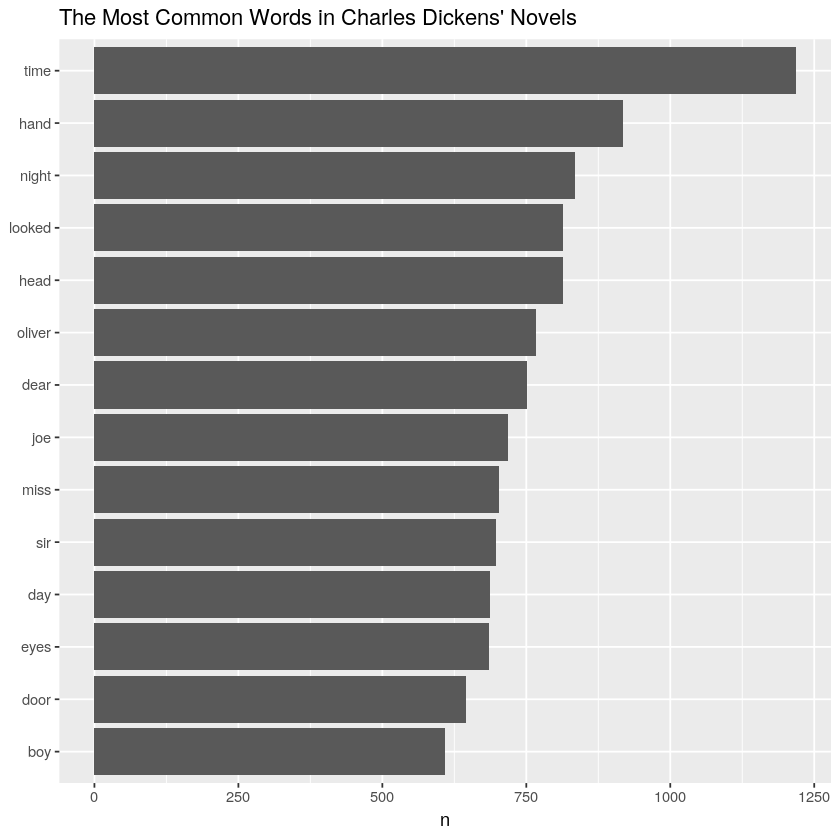

In [7]:
tidy_dickens %>%
  count(word, sort = TRUE) %>%
  filter(n > 600) %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n)) +
  geom_col() +
  xlab(NULL) +
  coord_flip() + ggtitle("The Most Common Words in Charles Dickens' Novels")

In [8]:
bing_word_counts <- tidy_dickens %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  ungroup()
# bing_word_counts

Joining, by = "word"


Selecting by n


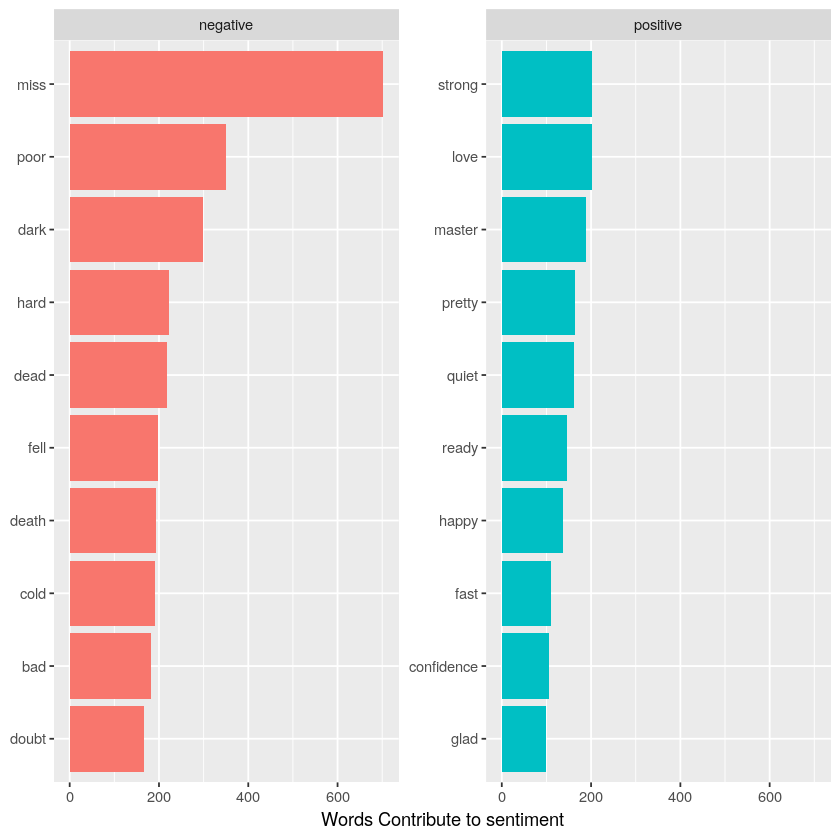

In [9]:
bing_word_counts %>%
  group_by(sentiment) %>%
  top_n(10) %>%
  ungroup() %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free_y") +
  labs(y = "Words Contribute to sentiment",
       x = NULL) +
  coord_flip()

Loading required package: RColorBrewer
Joining, by = "word"


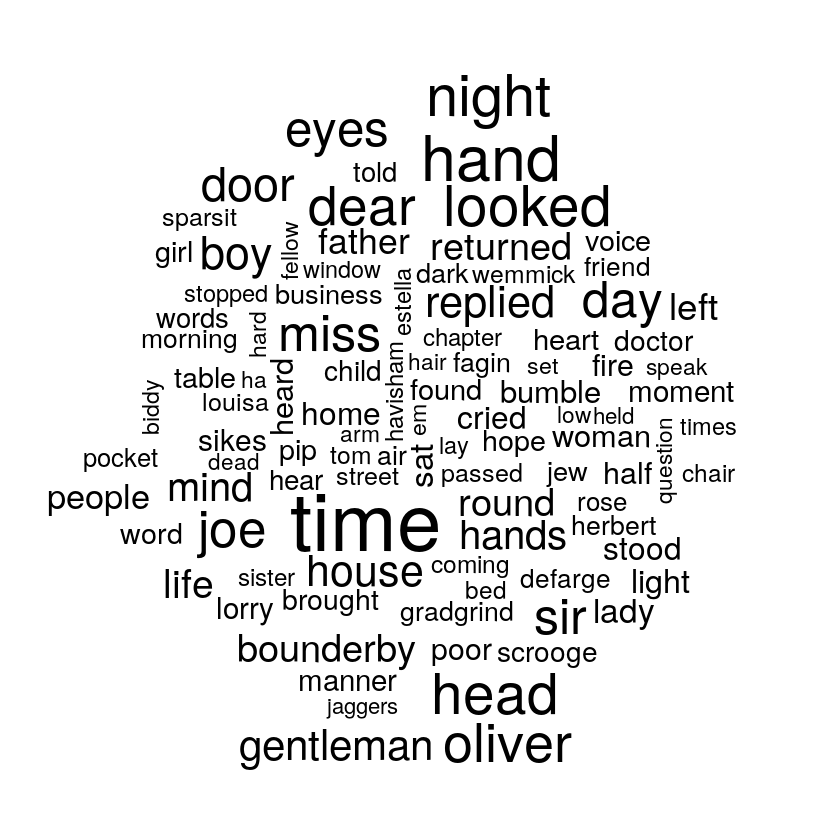

In [10]:
# if(!require('wordcloud')) install.packages('wordcloud')
library(wordcloud)
tidy_dickens %>%
  anti_join(stop_words) %>%
  count(word) %>%
  with(wordcloud(word, n, max.words = 100))

Joining, by = "word"


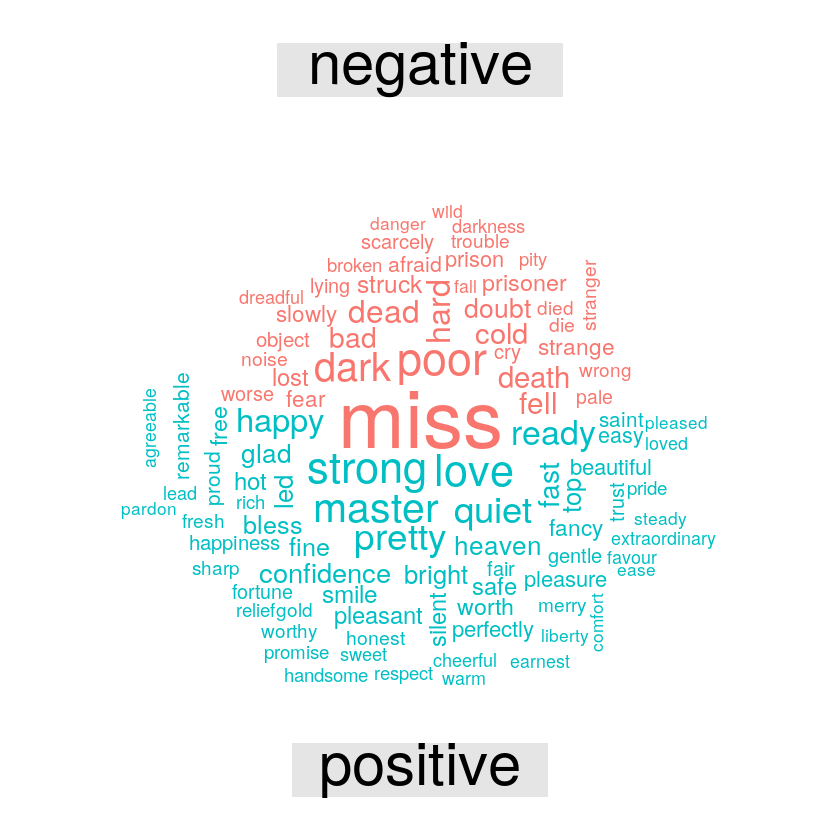

In [11]:
library(reshape2)
tidy_dickens %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  acast(word ~ sentiment, value.var = "n", fill = 0) %>%
  comparison.cloud(colors = c("#F8766D", "#00BFC4"),
                   max.words = 100)

<span style="color:royalblue"> **Extrai relação entre as palavras (ocorrências de bigramas)** </span>

In [13]:
dickens_bigrams <- dickens %>%
  unnest_tokens(bigram, text, token = "ngrams", n = 2)
# dickens_bigrams

- Cada token agora representa um bigrama;
- Remove stopwords;
- Verifica bigramas mais frequentes

In [15]:
library(tidyr)
bigrams_separated <- dickens_bigrams %>%
  separate(bigram, c("word1", "word2"), sep = " ")
bigrams_filtered <- bigrams_separated %>%
  filter(!word1 %in% stop_words$word) %>%
  filter(!word2 %in% stop_words$word)
bigram_counts <- bigrams_filtered %>% 
  count(word1, word2, sort = TRUE)
# bigram_counts

In [17]:
bigrams_united <- bigrams_filtered %>%
  unite(bigram, word1, word2, sep = " ")
# bigrams_united

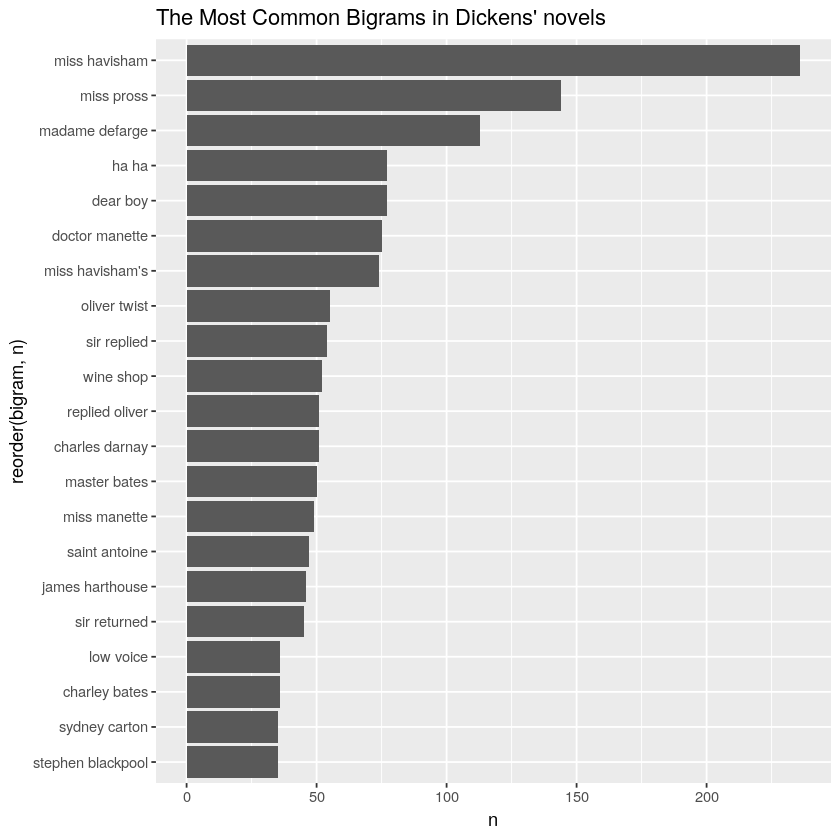

In [18]:
bigram_tf_idf <- bigrams_united %>%
  count(bigram)
bigram_tf_idf <- bigram_tf_idf %>% filter(n>30)
ggplot(aes(x = reorder(bigram, n), y=n), data=bigram_tf_idf) + geom_bar(stat = 'identity') + ggtitle("The Most Common Bigrams in Dickens' novels") + coord_flip()

In [20]:
library(igraph)
bigram_graph <- bigram_counts %>%
  filter(n > 20) %>%
  graph_from_data_frame()
# bigram_graph

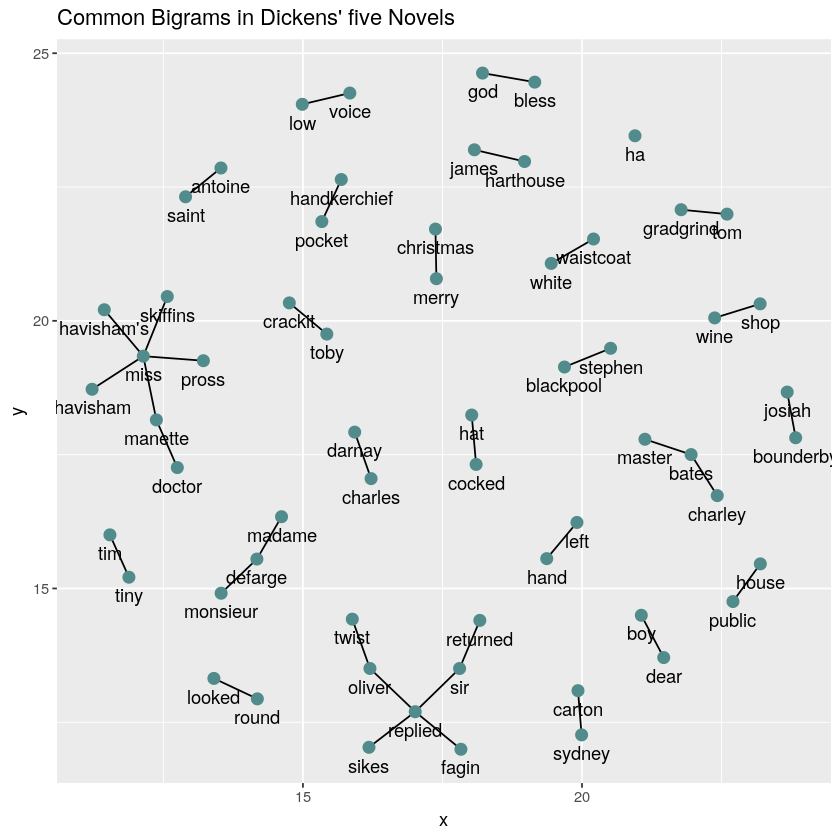

In [21]:
library(ggraph)
set.seed(2017)
ggraph(bigram_graph, layout = "fr") +
  geom_edge_link() +
  geom_node_point(color = "darkslategray4", size = 3) +
  geom_node_text(aes(label = name), vjust = 1.8) + ggtitle("Common Bigrams in Dickens' five Novels")